In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

/Users/Dinesh/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('/Users/Dinesh/Documents/Project Stock predictions/data/pickled_ten_year_filtered_data.pkl')

In [3]:
df_stocks

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


In [4]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [5]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [6]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df_stocks

,prices,articles
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


In [8]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


In [9]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [10]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print df_stocks.loc[date, 'articles']
        print date

In [12]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9735,0.153,0.748,0.099
2007-01-02,12472,-0.9664,0.122,0.784,0.095
2007-01-03,12474,-0.9994,0.207,0.733,0.06
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9975,0.193,0.739,0.069
2007-01-08,12423,-0.973,0.114,0.788,0.098
2007-01-09,12416,-0.9945,0.104,0.844,0.052
2007-01-10,12442,-0.9863,0.141,0.742,0.117


In [13]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

In [14]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [15]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [16]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [17]:
y_train1 = pd.DataFrame(train['prices'])
y_test1 = pd.DataFrame(test['prices'])

# Implementing Linear Regression

In [18]:
# converting into numpy array
y_train = np.asarray(y_train['prices'], dtype=float)
y_test = np.asarray(y_test['prices'], dtype = float)

In [19]:
# Calculating absolute price
def calc_normalized(y):
    max_value = np.max(y)
    normalized_price = y
    for i in range(len(y)):
        normalized_price[i] = y[i] / max_value
    return normalized_price    

In [20]:
X = numpy_df_train
Y = numpy_df_test
y_train = calc_normalized(y_train)
y_test = calc_normalized(y_test)

In [21]:
import math
def logistic_activation(x):
    return (1 / (1 + math.exp(-x)))

In [22]:
def error_rate(act_value, price):
    return (act_value - price)**2

In [23]:
from random import randint
weight_list = []
for i in range(X.shape[1]):
    print random.random()
    weight_list.append(random.random())
weight = np.asarray((weight_list), dtype = float)

0.664025258556
0.484477395266
0.969145537466
0.140241126146


In [24]:
weights = np.asarray((0.269195965786,0.850618420406,0.763765631309,0.222380438615))
print weights

[ 0.26919597  0.85061842  0.76376563  0.22238044]


In [25]:
weights = np.asarray((0.0,0.0,0.0,0.0))
print weights

[ 0.  0.  0.  0.]


In [26]:
def sgd(predicted_value, actual_value, X_):
    return ((predicted_value - actual_value) * predicted_value * (1 - predicted_value)) * X_

In [27]:
def predict(row, weights):
    weighted_sum = 0.0
    for i in range(len(weights)):
        weighted_sum = weighted_sum + row[i] * weights[i] 
    #print weighted_sum
    act_value = logistic_activation(weighted_sum)
    return act_value

In [28]:
# Without dividing
def train(X, y_train, weights, learning_rate ):
    for row in range(X.shape[0]):
        predicted_value = predict(X[row], weights) 
        print predicted_value
        for i in range(X.shape[1]):
            sgd_value = sgd(predicted_value, y_train[row], X[row][i])
            weights[i] = weights[i] - learning_rate * sgd_value 
    return weights

In [29]:
def train(X, y_train, weights, learning_rate, n):
    row = 0
    while (row < X.shape[0] - n):
        for theta_no in range(X.shape[1]):
            sgd_value = 0
            for i in range(n):
                predicted_value = predict(X[row + i], weights) 
                #print predicted_value
                sgd_value += sgd(predicted_value, y_train[row + i], X[row + i][theta_no])
            weights[theta_no] = weights[theta_no] - learning_rate * sgd_value / n
        row += 6
    return weights, sgd_value

In [30]:
def test(Y, y_test, weights):
    row = 0
    predicted_value = []
    err = []
    while (row < Y.shape[0]):
            sgd_value = 0
            predicted_value.append(predict(Y[row], weights))
            err.append(error_rate(y_test[row], predicted_value[row]))
                #print predicted_value
                #sgd_value +=  sgd_value + sgd(predicted_value[row+i], y_train[row + i], Y[row + i][theta_no])
            #weights[theta_no] = weights[theta_no] - learning_rate * sgd_value / n
            row += 1
    return (sum(err)/float(len(err))), predicted_value

In [31]:
def training(X, y_train, epoch, n, learning_rate, weights):
    # initialize weights with 0
    
    #weights = np.asarray((0.0,0.0,0.0,0.0))
    while (epoch > 0):
        weights, sgd_value = train(X, y_train, weights, learning_rate = learning_rate, n = n)
        #sgd_value = sgd_value / (len(X) / n)
        #print weights, sgd_value
        epoch -=1
    return weights

In [32]:
weights = np.asarray((0.0,0.0,0.0,0.0))
sum(weights)

0.0

In [33]:
weights = training(X, y_train, epoch = 20, n = 6, learning_rate = 0.001, weights = weights)

In [34]:
print weights

[-0.25181969  0.04908668  0.25589504  0.03267645]


In [37]:
weights = np.asarray((0.0,0.0,0.0,0.0))
threshold = 0.03
#while err > threshold:
count = 400
while count > 0:
    weights = training(X, y_train, epoch = 20, n = 6, learning_rate = 0.0001, weights = weights)
    err, predicted_value = test(Y, y_test, weights)
    print err
    count -= 1

0.141342626676
0.131263135856
0.122397296317
0.114594731993
0.107718675766
0.101647391711
0.0962741113906
0.0915061226898
0.0872634414955
0.0834773376522
0.0800888748448
0.0770475501246
0.0743100723312
0.0718392909758
0.0696032716622
0.0675745062769
0.0657292428977
0.0640469197166
0.0625096880156
0.0611020106412
0.0598103240775
0.0586227538728
0.0575288747176
0.0565195078502
0.0555865496574
0.0547228263618
0.0539219705422
0.0531783159554
0.0524868077242
0.0518429254527
0.0512426172388
0.0506822428952
0.0501585249675
0.0496685063722
0.049209513666
0.0487791251202
0.0483751429018
0.0479955687759
0.0476385828327
0.0473025248184
0.046985877716
0.0466872532696
0.0464053791969
0.0461390878672
0.0458873062564
0.0456490470161
0.0454234005189
0.0452095277568
0.0450066539916
0.0448140630653
0.0446310922934
0.0444571278728
0.0442916007459
0.0441339828686
0.0439837838372
0.0438405478357
0.0437038508674
0.0435732982418
0.0434485222887
0.0433291802774
0.0432149525182
0.0431055406294
0.0430006659525


In [38]:
predicted_value

[0.6973643462637892,
 0.7021396711372613,
 0.706412875382257,
 0.6963538090193993,
 0.7038815613840999,
 0.7018178875516633,
 0.7067953649055265,
 0.6982647729079701,
 0.6987467058799063,
 0.7019186437709493,
 0.7053418839033817,
 0.7058630236005157,
 0.7001474728098831,
 0.704267880037492,
 0.7043165482865493,
 0.6942036998158446,
 0.7048948473297324,
 0.6985782848070838,
 0.6931776046341972,
 0.7071953350916609,
 0.704466461541663,
 0.7122037798098315,
 0.7004923832271858,
 0.6880529077690802,
 0.6951495762739249,
 0.6657501343162947,
 0.7124723660199951,
 0.697660704430895,
 0.7012001826205888,
 0.7002436759211014,
 0.7001637851298727,
 0.6939244719145293,
 0.6400049469557008,
 0.7012496147658839,
 0.7041387475057758,
 0.6935009543659396,
 0.7023572095204976,
 0.7098490508856946,
 0.6917475797550632,
 0.7025300931022912,
 0.7007658031928071,
 0.7089075717931567,
 0.6999933895604982,
 0.7015194812498573,
 0.6947144707321493,
 0.6923445618395155,
 0.6995330955963119,
 0.69963297562111

In [39]:
def unnormalize(y):
    max_value = np.max(y_test1['prices'])
    unnormalized_price = y
    for i in range(len(y)):
        unnormalized_price[i] = y[i] * max_value
    return unnormalized_price   

In [40]:
np.max(y_test1['prices'])

19974

In [41]:
preds = unnormalize(predicted_value)

In [42]:
preds

[13929.155452272926,
 14024.537791295657,
 14109.890772885203,
 13908.970981353481,
 14059.330307086011,
 14018.110485956922,
 14117.530618622986,
 13947.140574063795,
 13956.766703245248,
 14020.12299068094,
 14088.498789086147,
 14098.9080333967,
 13984.745621904605,
 14067.046635868865,
 14068.018735475536,
 13866.024700121681,
 14079.569680564075,
 13953.402660736692,
 13845.529474963454,
 14125.519623120834,
 14071.013102833178,
 14225.558297921574,
 13991.63486257981,
 13743.16877977961,
 13884.917636495376,
 13297.693182833671,
 14230.923038883382,
 13935.074910302697,
 14005.772447663641,
 13986.66718284808,
 13985.071444184076,
 13860.447402020809,
 12783.458810493166,
 14006.759805333764,
 14064.467342680366,
 13851.988062505277,
 14028.88290296242,
 14178.524942390864,
 13816.966158027632,
 14032.336079625164,
 13997.09615297313,
 14159.71983899651,
 13981.66796308139,
 14012.15011848465,
 13876.22683840395,
 13828.890278182484,
 13972.474051440735,
 13974.469055056114,
 140

In [43]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=preds[0:], index = idx, columns=['prices'])

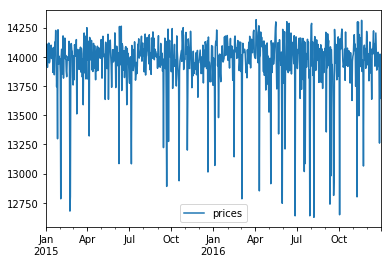

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
predictions_df_list = predictions_df
predictions_df.plot()

/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=0,adjust=True,freq=D).mean()
  from ipykernel import kernelapp as app
/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=0,adjust=True,freq=D).mean()


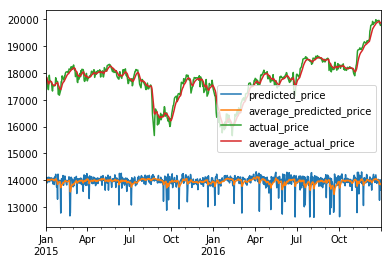

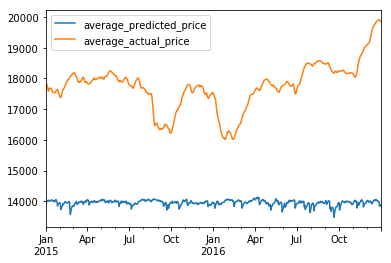

In [45]:
# Smoothing the plot
predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
predictions_df_list['actual_value'] = y_test1['prices']
predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()


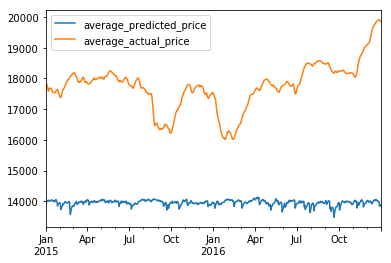

In [46]:
predictions_df_list_average.plot()